### 문장이 벡터화 되는 과정

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-uncased")

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
input_ids = tokenizer('i want to eat delicious food.', return_tensors='pt')

print(input_ids ['input_ids'])
print(input_ids ['input_ids'].shape)

tensor([[  101,  1045,  2215,  2000,  4521, 12090,  2833,  1012,   102]])
torch.Size([1, 9])


In [19]:
tokenizer.convert_ids_to_tokens(input_ids ['input_ids'][0])

['[CLS]', 'i', 'want', 'to', 'eat', 'delicious', 'food', '.', '[SEP]']

In [23]:
model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [12]:
embedding = model.bert.embeddings(input_ids ['input_ids'])
embedding

tensor([[[ 1.6855e-01, -2.8577e-01, -3.2613e-01,  ..., -2.7571e-02,
           3.8253e-02,  1.6400e-01],
         [-3.4026e-04,  5.3974e-01, -2.8805e-01,  ...,  7.5731e-01,
           8.9008e-01,  1.6575e-01],
         [-3.9507e-01, -4.8281e-01, -2.7145e-02,  ...,  3.8478e-01,
           8.2980e-01, -8.0975e-01],
         ...,
         [ 8.4121e-02,  9.9452e-02, -3.0035e-02,  ...,  1.3311e-01,
           6.2196e-01, -4.2563e-01],
         [-1.7839e-01,  4.5461e-02, -5.2727e-02,  ...,  3.0492e-01,
           7.3745e-01,  5.6209e-01],
         [-2.3061e-01, -2.4164e-01, -4.0893e-02,  ..., -2.8555e-01,
           2.4370e-01, -7.0539e-02]]], grad_fn=<NativeLayerNormBackward0>)

In [22]:
embedding.shape

torch.Size([1, 9, 768])

### 다음 단어 예측하기

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("naver-hyperclovax/HyperCLOVAX-SEED-Text-Instruct-0.5B")
model = AutoModelForCausalLM.from_pretrained("naver-hyperclovax/HyperCLOVAX-SEED-Text-Instruct-0.5B")

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(110592, 1024, padding_idx=100257)
    (layers): ModuleList(
      (0-23): 24 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=1024, out_features=2048, bias=False)
          (k_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (v_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (o_proj): Linear(in_features=2048, out_features=1024, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=1024, out_features=4096, bias=False)
          (up_proj): Linear(in_features=1024, out_features=4096, bias=False)
          (down_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((1024,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((1024,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((1024,), eps=1e

In [38]:
chat = [
    {"role": "tool_list", "content": ""},
    {"role": "system", "content": "- AI 언어모델의 이름은 \"CLOVA X\" 이며 네이버에서 만들었다.\n- 오늘은 2025년 04월 24일(목)이다."},
    {"role": "user", "content": "슈뢰딩거 방정식과 양자역학의 관계를 최대한 자세히 알려줘."},
]

inputs = tokenizer.apply_chat_template(chat, add_generation_prompt=True, return_dict=True, return_tensors="pt")
print(inputs['input_ids'].shape)

torch.Size([1, 71])


In [5]:
o = model(inputs['input_ids'])

In [7]:
o.logits.shape

torch.Size([1, 71, 110592])

In [16]:
o.logits[:,-1,:].shape

torch.Size([1, 110592])

In [18]:
import torch
torch.argmax(o.logits[:,-1,:])

tensor(106097)

In [20]:
tokenizer.decode([106097])

'슈'

/tmp/ipykernel_13948/3336178769.py:56: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Noto Sans CJK KR.
  plt.tight_layout()
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Noto Sans CJK KR.
  fig.canvas.print_figure(bytes_io, **kw)


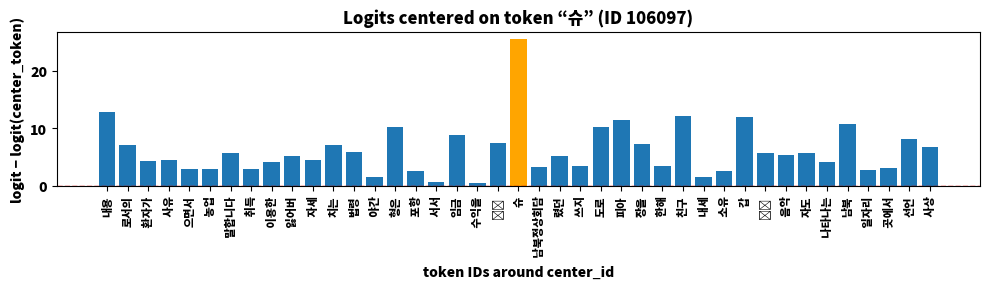

In [37]:
import torch
import matplotlib.pyplot as plt

# (A) Extract the final‐time‐step logits
last_logits = o.logits[:, -1, :].squeeze(0)   # shape: [vocab_size]

# (B) Pick the “center” token ID (the one you care about):
center_id = torch.argmax(last_logits).item()  

# ─── Step 2: build a “centered” logits vector
# We subtract the logit of the center token, so that its centered‐value becomes zero.
center_value = last_logits[center_id]
centered_logits = last_logits# - center_value    # still shape [vocab_size]

# ─── Step 3: restrict to a small index‐window around `center_id`
window = 20
vocab_size = centered_logits.shape[0]

start_idx = max(center_id - window, 0)
end_idx   = min(center_id + window + 1, vocab_size)

indices = torch.arange(start_idx, end_idx)                 # tensor of IDs
values  = centered_logits[indices].detach().numpy()           # numpy‐array of logits

# Decode each ID into its string form (subword/character token) for x‐tick labels:
token_labels = [tokenizer.decode([int(i)]) for i in indices]

# ─── Step 4: plot with Matplotlib
plt.figure(figsize=(10, 3))
plt.bar(range(len(indices)), values, align='center')
plt.axhline(0.0, color='red', linewidth=1, linestyle='--')

# font_path='fonts/NotoSansCJKkr-Black.otf'
# fm.fontManager.addfont(font_path)
# font_prop = fm.FontProperties(fname=font_path)
# name = font_prop.get_name()  # e.g. "Noto Sans CJK KR"
# plt.rcParams["font.sans-serif"] = [name]
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["axes.unicode_minus"] = False

# Label the “center” bar in a different color (optional)
center_pos = (center_id - start_idx)
plt.bar(center_pos, values[center_pos], color='orange', align='center')

# Attach token‐strings as x‐ticks, rotated vertically if necessary
plt.xticks(
    ticks=list(range(len(indices))),
    labels=token_labels,
    rotation=90,
    fontsize=8
)

plt.title(f"Logits centered on token “{tokenizer.decode([center_id])}” (ID {center_id})")
plt.ylabel("logit − logit(center_token)")
plt.xlabel("token IDs around center_id")
plt.tight_layout()
plt.show()
